In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [8]:
save_dir = 'runs\\detect\\predict'

image_names = ['img_00000020.jpg','img2.jpg']

current_path = os.getcwd()
image_path = [current_path + '\\data\\img\\Watercolor_Floral_Print_Blouse\\' + image_names[0], current_path + "\\" + image_names[1]]

In [3]:
def show_image(image_path):
    # Ensure the image file exists before trying to display it
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return
    
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')  # Turn off the axis
    plt.show()

In [4]:
model = YOLO('runs/detect/train/weights/best.pt')

In [5]:
# Run batched inference on a list of images
results = model.predict(source=image_path, save=True, save_dir=save_dir)

0: 640x640 1 Blouse, 48.4ms
1: 640x640 1 Blouse, 48.4ms
Speed: 2.6ms preprocess, 48.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


for result in results:
    '''boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs'''
    image_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off the axis
    plt.show()

In [6]:
def show_results(images, path):
    for image_name in images:
        annotated_image_path = os.path.join(path, image_name)
        show_image(annotated_image_path)

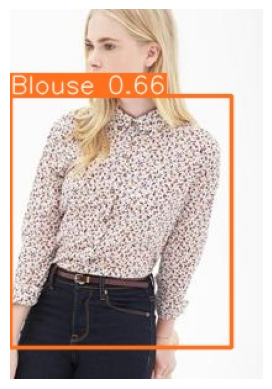

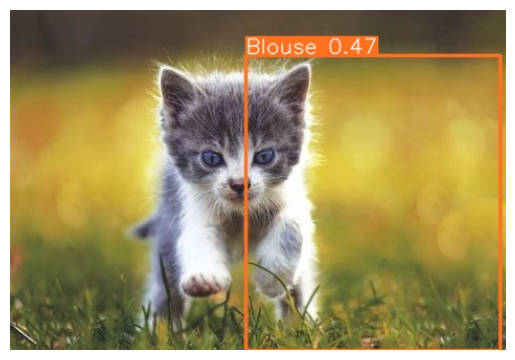

In [9]:
show_results(image_names, save_dir)

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'

In [ ]:
def tests(correct_images_path, incorrect_images_path):
    
    correct_images = os.listdir(correct_images_path)[0:10]
    incorrect_images = os.listdir(incorrect_images_path)[0:10] 
    
    image_path = correct_images.append(incorrect_images)
    
    results = model.predict(source=image_path, save=True, save_dir = save_dir)
    
    show_results(results)